In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf 

In [7]:
##### Creating Dataframe of images' path  Train #####

translate = {"Bird": "Bird", "Cat": "Cat", "Chicken": "Chicken", "Cow": "Cow", "Dog": "Dog", "Elephant": "Elephant", "Fish": "Fish","Frog":"Frog","Horse":"Horse","Lion":"Lion","Sheep":"Sheep","Giraffe":"Giraffe","Monkey":"Monkey","Fox":"Fox"}# choose only first 1400 images.
foldernames = os.listdir('Dataset/Train/')
files, target= [], []

for i, folder in enumerate(foldernames):
    filenames = os.listdir("Dataset/Train/" + folder);
    count = 0
    for file in filenames:
            files.append("Dataset/Train/" + folder + "/" + file)
            target.append(translate[folder])

df_train = pd.DataFrame({'Path':files, 'Label':target})
df_train

,Path,Label
0,Dataset/Train/Bird/00aa85aa816f3acb.jpg,Bird
1,Dataset/Train/Bird/00d8310deaf37fca.jpg,Bird
2,Dataset/Train/Bird/00ee44f77baf74b0.jpg,Bird
3,Dataset/Train/Bird/010a77d0f89b4771.jpg,Bird
4,Dataset/Train/Bird/01df541bf57cf4fc.jpg,Bird
...,...,...
14813,Dataset/Train/Sheep/Sheep.OIP-GbqsrSbGP-2z9mgH...,Sheep
14814,Dataset/Train/Sheep/Sheep.OIP-GCqqv1TB6awGbSkG...,Sheep
14815,Dataset/Train/Sheep/Sheep.OIP-gdLu90V3SKKpWCCk...,Sheep
14816,Dataset/Train/Sheep/Sheep.OIP-GE9Nizf-56YhSwzF...,Sheep


In [8]:
##### Creating Dataframe of images' path  Test #####
foldernames = os.listdir('Dataset/Test/')
files, target= [], []

for i, folder in enumerate(foldernames):
    filenames = os.listdir("Dataset/Test/" + folder);
    count = 0
    for file in filenames:
            files.append("Dataset/Test/" + folder + "/" + file)
            target.append(translate[folder])

df_test = pd.DataFrame({'Path':files, 'Label':target})
df_test

,Path,Label
0,Dataset/Test/Bird/07219696b2145fea.jpg,Bird
1,Dataset/Test/Bird/0cdb25be5c118568.jpg,Bird
2,Dataset/Test/Bird/0fd50f6c85514540.jpg,Bird
3,Dataset/Test/Bird/10f2745326977148.jpg,Bird
4,Dataset/Test/Bird/1333e9435253c98c.jpg,Bird
...,...,...
5923,Dataset/Test/Sheep/Sheep.OIP-gbxNqYWOnt5R3tvyu...,Sheep
5924,Dataset/Test/Sheep/Sheep.OIP-gcDcCfuuTunDGoyjk...,Sheep
5925,Dataset/Test/Sheep/Sheep.OIP-GEALVwEJWNmxTv1hS...,Sheep
5926,Dataset/Test/Sheep/Sheep.OIP-GgC74X3eaAn2BK0uJ...,Sheep


In [9]:
datagen = ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        rotation_range=30, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        samplewise_center = True,
        )

datagen_test = ImageDataGenerator(rescale=1./255, samplewise_center = True)

train_flow = datagen.flow_from_dataframe(df_train, x_col = 'Path', y_col = 'Label', target_size=(224, 224), interpolation = 'lanczos', validate_filenames = False)
test_flow = datagen_test.flow_from_dataframe(df_test, x_col = 'Path', y_col = 'Label', target_size=(224, 224), interpolation = 'lanczos', validate_filenames = False)

Found 14818 non-validated image filenames belonging to 14 classes.
Found 5928 non-validated image filenames belonging to 14 classes.


In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (224, 224, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(14, activation=tf.nn.softmax)
])

In [14]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 1, verbose = 1, min_delta=0.0001, min_lr = 1e-8)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 256)       2

In [15]:
history = model.fit(train_flow, epochs = 10, validation_data = test_flow)

Epoch 1/10
464/464 [==============================] - 1353s 3s/step - loss: 2.1478 - accuracy: 0.2641 - val_loss: 1.8886 - val_accuracy: 0.3551
Epoch 2/10
464/464 [==============================] - 1346s 3s/step - loss: 1.8173 - accuracy: 0.3884 - val_loss: 1.7159 - val_accuracy: 0.4271
Epoch 3/10
464/464 [==============================] - 1346s 3s/step - loss: 1.6671 - accuracy: 0.4459 - val_loss: 1.7708 - val_accuracy: 0.4435
Epoch 4/10
464/464 [==============================] - 10992s 24s/step - loss: 1.5369 - accuracy: 0.4943 - val_loss: 1.5042 - val_accuracy: 0.5101
Epoch 5/10
464/464 [==============================] - 1335s 3s/step - loss: 1.4014 - accuracy: 0.5337 - val_loss: 1.3691 - val_accuracy: 0.5648
Epoch 6/10
464/464 [==============================] - 1171s 3s/step - loss: 1.2978 - accuracy: 0.5685 - val_loss: 1.3220 - val_accuracy: 0.5715
Epoch 7/10
464/464 [==============================] - 1100s 2s/step - loss: 1.2065 - accuracy: 0.5951 - val_loss: 1.4205 - val_accurac

In [17]:
#Save the model
model.save_weights('CNN4.h5')
model.save('model_CNN4.h5')

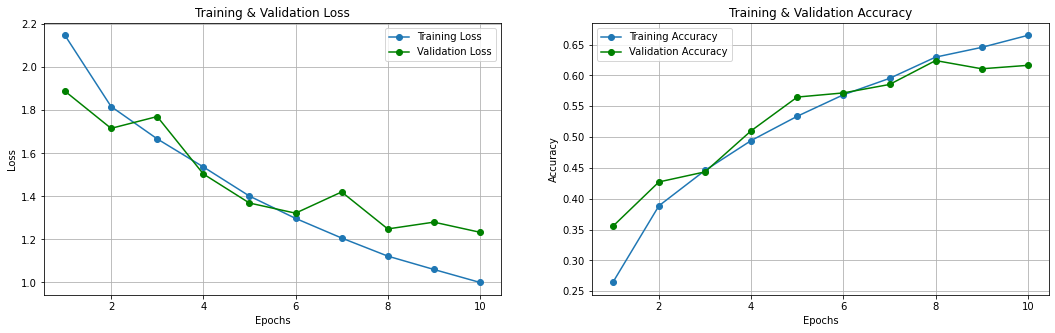

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [18]:
#Affichage des courbes accuracy et Loss
loss_vals = history.history['loss']
val_loss_vals = history.history['val_loss']
epochs = range(1, len(history.history['accuracy'])+1)

f, ax = plt.subplots(nrows=1,ncols=2,figsize=(18,5))
    
ax[0].plot(epochs, loss_vals,  marker='o', label='Training Loss')
ax[0].plot(epochs, val_loss_vals, marker='o', color = 'green', label='Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend(loc='best')
ax[0].grid(True)

acc_vals = history.history['accuracy']
val_acc_vals = history.history['val_accuracy']

ax[1].plot(epochs, acc_vals, marker='o', label='Training Accuracy')
ax[1].plot(epochs, val_acc_vals, marker='o', color = 'green', label='Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend(loc='best')
ax[1].grid(True)

plt.show()
f.savefig('LossAndAccuracy.eps', format='eps')
plt.close()
del loss_vals, val_loss_vals, epochs, acc_vals, val_acc_vals

In [2]:
from keras.models import load_model
model = load_model('model_CNN4.h5')

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_test = ImageDataGenerator(rescale=1./255, samplewise_center = True)


In [21]:
test_generator=datagen_test.flow_from_directory("Dataset/Test",
                                               target_size=(224,224),
                                                batch_size=128,
                                                class_mode='categorical')

Found 5928 images belonging to 14 classes.


In [ ]:
test_loss, test_acc=model.evaluate(test_generator)

   8338/Unknown - 17448s 2s/step - loss: 1.4224 - accuracy: 0.5818

In [ ]:
y_pred=model.predict_generator(test_generator)